In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score


In [2]:
fedex_data = pd.read_csv('fedex_data/fedex.csv')

In [3]:
fedex_data.head(11)

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0
5,2008,1,3,4,1940.0,1915,2110,WN,378,115.0,25.0,IND,JAX,688,1.0
6,2008,1,3,4,1937.0,1830,1940,WN,509,250.0,67.0,IND,LAS,1591,1.0
7,2008,1,3,4,1039.0,1040,1150,WN,535,250.0,-1.0,IND,LAS,1591,0.0
8,2008,1,3,4,617.0,615,650,WN,11,95.0,2.0,IND,MCI,451,0.0
9,2008,1,3,4,1620.0,1620,1655,WN,810,95.0,0.0,IND,MCI,451,0.0


In [4]:
fedex_data.shape

(3604175, 15)

In [5]:
fedex_data.count()

Year                     3604175
Month                    3604175
DayofMonth               3604175
DayOfWeek                3604175
Actual_Shipment_Time     3522573
Planned_Shipment_Time    3604175
Planned_Delivery_Time    3604175
Carrier_Name             3604175
Carrier_Num              3604175
Planned_TimeofTravel     3603628
Shipment_Delay           3522573
Source                   3604175
Destination              3604175
Distance                 3604175
Delivery_Status          3522573
dtype: int64

In [6]:
#dataobject.dtypes are the classification or categorization of data items. 
#It represents the kind of value that tells what operations can be performed on a particular data

fedex_data.dtypes

Year                       int64
Month                      int64
DayofMonth                 int64
DayOfWeek                  int64
Actual_Shipment_Time     float64
Planned_Shipment_Time      int64
Planned_Delivery_Time      int64
Carrier_Name              object
Carrier_Num                int64
Planned_TimeofTravel     float64
Shipment_Delay           float64
Source                    object
Destination               object
Distance                   int64
Delivery_Status          float64
dtype: object

In [7]:
fedex_data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Actual_Shipment_Time',
       'Planned_Shipment_Time', 'Planned_Delivery_Time', 'Carrier_Name',
       'Carrier_Num', 'Planned_TimeofTravel', 'Shipment_Delay', 'Source',
       'Destination', 'Distance', 'Delivery_Status'],
      dtype='object')

describe() method in Pandas is a convenient way to get a quick overview of your data. By default, it provides the count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum of the columns.

In [8]:
fedex_data.describe()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Distance,Delivery_Status
count,3604175.0,3.604175e+06,3.604175e+06,3.604175e+06,3.522573e+06,3.604175e+06,3.604175e+06,3.604175e+06,3.603628e+06,3.522573e+06,3.604175e+06,3.522573e+06
mean,2008.0,3.514942e+00,1.568481e+01,3.934604e+00,1.338455e+03,1.329371e+03,1.495305e+03,2.223795e+03,1.291603e+02,1.115893e+01,7.280915e+02,2.038890e-01
std,0.0,1.709912e+00,8.763332e+00,1.987126e+00,4.814053e+02,4.664365e+02,4.854825e+02,1.944583e+03,6.951011e+01,3.618888e+01,5.611318e+02,4.028875e-01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-2.500000e+01,-9.200000e+01,1.100000e+01,0.000000e+00
25%,2008.0,2.000000e+00,8.000000e+00,2.000000e+00,9.290000e+02,9.250000e+02,1.115000e+03,6.160000e+02,8.000000e+01,-4.000000e+00,3.250000e+02,0.000000e+00
50%,2008.0,4.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.321000e+03,1.519000e+03,1.573000e+03,1.110000e+02,-1.000000e+00,5.830000e+02,0.000000e+00
75%,2008.0,5.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.910000e+03,3.602000e+03,1.600000e+02,1.000000e+01,9.570000e+02,0.000000e+00
max,2008.0,6.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,9.741000e+03,1.435000e+03,2.467000e+03,4.962000e+03,1.000000e+00


In Pandas, the info() method is used to get a concise summary of a DataFrame. The number of rows and columns, Column names and their data types, Non-null values in each column, and Memory usage.

In [9]:
fedex_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Month                  int64  
 2   DayofMonth             int64  
 3   DayOfWeek              int64  
 4   Actual_Shipment_Time   float64
 5   Planned_Shipment_Time  int64  
 6   Planned_Delivery_Time  int64  
 7   Carrier_Name           object 
 8   Carrier_Num            int64  
 9   Planned_TimeofTravel   float64
 10  Shipment_Delay         float64
 11  Source                 object 
 12  Destination            object 
 13  Distance               int64  
 14  Delivery_Status        float64
dtypes: float64(4), int64(8), object(3)
memory usage: 412.5+ MB


In [10]:
# Checking of Null Values and sum of null values
fedex_data.isnull().sum() 

Year                         0
Month                        0
DayofMonth                   0
DayOfWeek                    0
Actual_Shipment_Time     81602
Planned_Shipment_Time        0
Planned_Delivery_Time        0
Carrier_Name                 0
Carrier_Num                  0
Planned_TimeofTravel       547
Shipment_Delay           81602
Source                       0
Destination                  0
Distance                     0
Delivery_Status          81602
dtype: int64

In [11]:
# dropna() method removes the rows that contains NULL values
fedex_data = fedex_data.dropna()

In [12]:
#checking data count after removing null values
fedex_data.count()

Year                     3522167
Month                    3522167
DayofMonth               3522167
DayOfWeek                3522167
Actual_Shipment_Time     3522167
Planned_Shipment_Time    3522167
Planned_Delivery_Time    3522167
Carrier_Name             3522167
Carrier_Num              3522167
Planned_TimeofTravel     3522167
Shipment_Delay           3522167
Source                   3522167
Destination              3522167
Distance                 3522167
Delivery_Status          3522167
dtype: int64

In [13]:
fedex_data.head()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


In [14]:
fedex_data.Delivery_Status.head(11)

0     0.0
1     1.0
2     0.0
3     0.0
4     1.0
5     1.0
6     1.0
7     0.0
8     0.0
9     0.0
10    0.0
Name: Delivery_Status, dtype: float64

Text(0, 0.5, 'Shipment Delay')

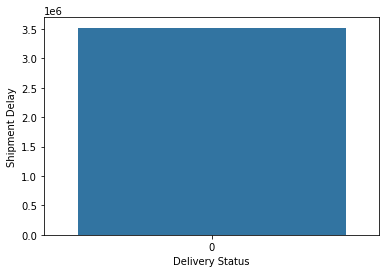

In [15]:
sns.countplot(fedex_data['Delivery_Status'])
plt.xlabel('Delivery Status')
plt.ylabel('Shipment Delay')

<AxesSubplot:xlabel='Delivery_Status', ylabel='Shipment_Delay'>

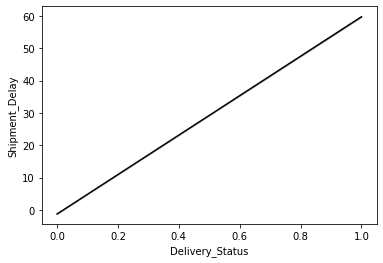

In [16]:
sns.lineplot(x='Delivery_Status',y='Shipment_Delay',data=fedex_data,color='black')

A correlation matrix heatmap is a powerful visualization tool in Python for understanding the relationships between multiple variables in the dataset. It is useful for visual clarity, pattern recognition, efficient exploration.

C:\Users\srija\AppData\Local\Temp\ipykernel_22740\927512759.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fedex_data.corr(),annot=True,cmap='viridis')


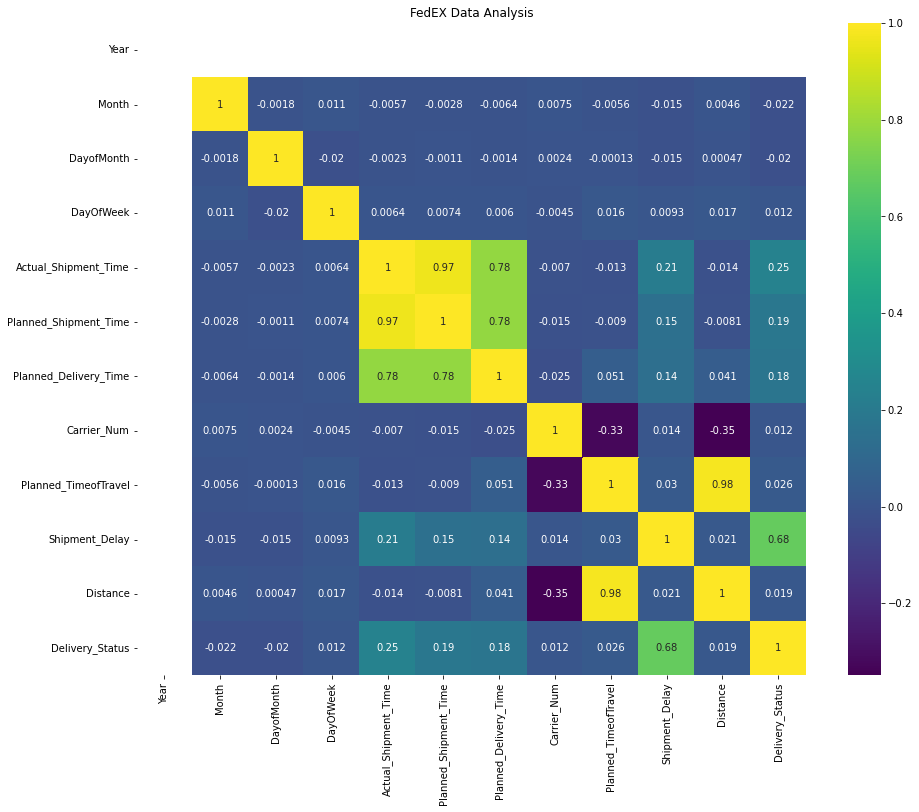

In [17]:
#Correlation Matrix
plt.rcParams['figure.figsize']=(15,12)
sns.heatmap(fedex_data.corr(),annot=True,cmap='viridis')
plt.title('FedEX Data Analysis')
plt.show()

New column created "Path" for the items by joing both the values using '-' in "Source" and "Destination" column.

In [18]:
fedex_data['Path'] = fedex_data[['Source', 'Destination']].apply(lambda x: '-'.join(x), axis = 1)
fedex_data['Path'].head(5)

0    IAD-TPA
1    IAD-TPA
2    IND-BWI
3    IND-BWI
4    IND-BWI
Name: Path, dtype: object

In [19]:
# df.drop method to drop mentioned columes fron the dataframe
fedex_data.drop(['Source', 'Destination', 'Carrier_Name'], axis = 1, inplace= True)

LabelEncoder is used to convert categorical text data into numerical values, making it easier for machine learning models to process. 
fit_transform method:
fit: Learns the unique categories in fedex_data['Path'].
transform: Maps each unique category to a unique integer and replaces each category with this corresponding integer in fedex_data['Path']

In [20]:
le = LabelEncoder()
fedex_data['Path'] = le.fit_transform(fedex_data['Path'])

In [21]:
fedex_data.head()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Distance,Delivery_Status,Path
0,2008,1,3,4,2003.0,1955,2225,335,150.0,8.0,810,0.0,2201
1,2008,1,3,4,754.0,735,1000,3231,145.0,19.0,810,1.0,2201
2,2008,1,3,4,628.0,620,750,448,90.0,8.0,515,0.0,2344
3,2008,1,3,4,926.0,930,1100,1746,90.0,-4.0,515,0.0,2344
4,2008,1,3,4,1829.0,1755,1925,3920,90.0,34.0,515,1.0,2344


In [22]:
X  = fedex_data.iloc[:, fedex_data.columns != 'Delivery_Status'].values
y = fedex_data['Delivery_Status'].values

In [23]:
# Viewing Independent and dependent columns
print(X[:,:5])
print(y)

[[2.008e+03 1.000e+00 3.000e+00 4.000e+00 2.003e+03]
 [2.008e+03 1.000e+00 3.000e+00 4.000e+00 7.540e+02]
 [2.008e+03 1.000e+00 3.000e+00 4.000e+00 6.280e+02]
 ...
 [2.008e+03 6.000e+00 1.900e+01 4.000e+00 8.210e+02]
 [2.008e+03 6.000e+00 1.900e+01 4.000e+00 7.180e+02]
 [2.008e+03 6.000e+00 1.900e+01 4.000e+00 1.127e+03]]
[0. 1. 0. ... 0. 0. 1.]


In [24]:
#Split dataset into training-70% and testing-30%

X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size=0.3)

sc = StandardScaler() is a common operation used in data preprocessing, particularly for scaling or normalizing features in machine learning. It will standardize the data to have a mean of 0 and a standard deviation of 1.
Standard Scaling is helpful
1. Feature Scaling: Many machine learning algorithms work best when features are on a similar scale. The StandardScaler transforms the data so that each feature has a mean of 0 and a standard deviation of 1, which places features on a comparable scale. Without this, algorithms that depend on distance measures (like SVMs, k-Nearest Neighbors, and neural networks) can be affected by features with larger scales.
2. Improved Convergence: For algorithms that use gradient descent (like neural networks and linear/logistic regression), standardizing can lead to faster convergence. When features are on a similar scale, the optimization process can navigate the cost function more efficiently.
3. Normalization for Interpretability: Standardizing features can also make coefficients or weights in linear models more interpretable by reducing the influence of feature magnitude.
4. Handles Outliers Better: Although scaling doesn’t remove outliers, standardization can mitigate the influence of large values in some cases by centering data around zero.

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
X_train[:,:5]

array([[ 0.        ,  0.86142361, -1.67919287,  0.03138691,  0.20903543],
       [ 0.        , -1.47862289, -0.76590545, -0.47163199, -1.0956032 ],
       [ 0.        , -0.89361126, -0.53758359, -1.47766978,  0.98600175],
       ...,
       [ 0.        ,  0.86142361, -0.9942273 , -0.47163199, -0.65102889],
       [ 0.        ,  0.86142361, -0.9942273 , -0.47163199, -1.30750311],
       [ 0.        ,  0.27641199,  0.14738198,  0.03138691,  0.57258919]])

In [27]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (2465516, 12)
X_test (1056651, 12)
y_train (2465516,)
y_test (1056651,)


In [29]:
def build_model():
    model = Sequential()
    model.add(Dense(10,activation='relu',input_shape=(12,)))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [30]:
classifier = KerasClassifier(build_fn = build_model , batch_size = 512 , nb_epoch = 20)

C:\Users\srija\AppData\Local\Temp\ipykernel_22740\2598436747.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_model , batch_size = 512 , nb_epoch = 20)


In [31]:
accuracy = cross_val_score(estimator = classifier , X=X_train, y=y_train, cv=10 , n_jobs = -1)

In [32]:
model=build_model()
X_train_new, X_test_val, y_train_new ,y_test_val = train_test_split(X_train,y_train,test_size=0.3)

model = model.fit(X_train_new,y_train_new,epochs=20,batch_size=50000,validation_data=(X_test_val, y_test_val))

Epoch 1/20
35/35 [==============================] - 3s 27ms/step - loss: 0.5409 - accuracy: 0.8007 - val_loss: 0.4934 - val_accuracy: 0.8581
Epoch 2/20
35/35 [==============================] - 1s 18ms/step - loss: 0.4586 - accuracy: 0.8650 - val_loss: 0.4226 - val_accuracy: 0.8697
Epoch 3/20
35/35 [==============================] - 1s 18ms/step - loss: 0.3928 - accuracy: 0.8732 - val_loss: 0.3619 - val_accuracy: 0.8778
Epoch 4/20
35/35 [==============================] - 1s 19ms/step - loss: 0.3360 - accuracy: 0.8824 - val_loss: 0.3089 - val_accuracy: 0.8885
Epoch 5/20
35/35 [==============================] - 1s 18ms/step - loss: 0.2850 - accuracy: 0.8951 - val_loss: 0.2597 - val_accuracy: 0.9032
Epoch 6/20
35/35 [==============================] - 1s 18ms/step - loss: 0.2380 - accuracy: 0.9109 - val_loss: 0.2157 - val_accuracy: 0.9195
Epoch 7/20
35/35 [==============================] - 1s 18ms/step - loss: 0.1975 - accuracy: 0.9266 - val_loss: 0.1791 - val_accuracy: 0.9344
Epoch 8/20
35

In [33]:
history_dict = model.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
acc = model.history['accuracy']
val_acc = model.history['val_accuracy']
loss = model.history['loss']
val_loss = model.history['val_loss']
epochs= range(1,len(acc)+1)

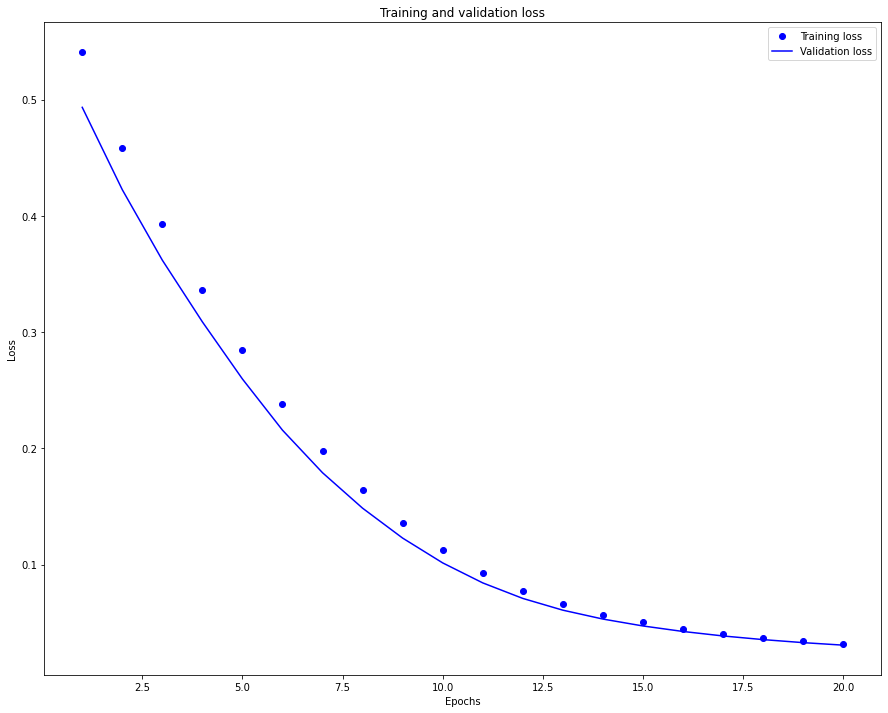

In [35]:
#training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

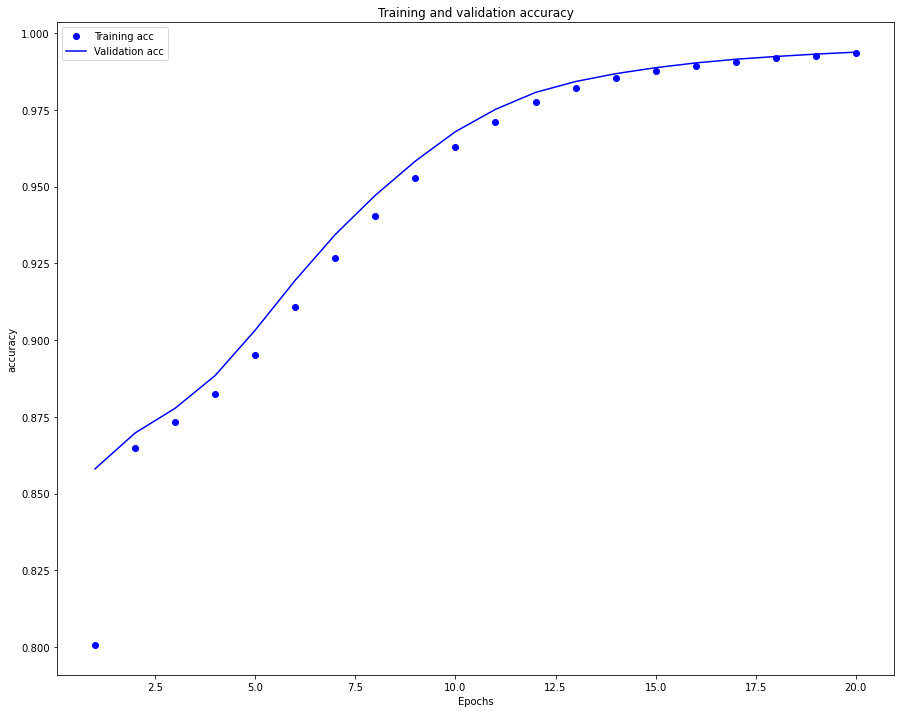

In [36]:
#Training and validation accuracy
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [37]:
model=Sequential()
model.add(Dense(X.shape[1],activation='relu',input_dim=X.shape[1]))
model.add(Dense(150,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=50000)

Epoch 1/20
50/50 [==============================] - 5s 74ms/step - loss: 0.4928 - accuracy: 0.8065
Epoch 2/20
50/50 [==============================] - 4s 77ms/step - loss: 0.2655 - accuracy: 0.9036
Epoch 3/20
50/50 [==============================] - 4s 89ms/step - loss: 0.1457 - accuracy: 0.9535
Epoch 4/20
50/50 [==============================] - 4s 73ms/step - loss: 0.0795 - accuracy: 0.9766
Epoch 5/20
50/50 [==============================] - 3s 69ms/step - loss: 0.0489 - accuracy: 0.9868
Epoch 6/20
50/50 [==============================] - 3s 65ms/step - loss: 0.0364 - accuracy: 0.9906
Epoch 7/20
50/50 [==============================] - 3s 65ms/step - loss: 0.0295 - accuracy: 0.9927
Epoch 8/20
50/50 [==============================] - 3s 60ms/step - loss: 0.0246 - accuracy: 0.9941
Epoch 9/20
50/50 [==============================] - 3s 56ms/step - loss: 0.0210 - accuracy: 0.9954
Epoch 10/20
50/50 [==============================] - 3s 56ms/step - loss: 0.0186 - accuracy: 0.9963
Epoch 11/

In [38]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

33021/33021 [==============================] - 63s 2ms/step - loss: 0.0083 - accuracy: 0.9993


Mean Error (ME) metric measures the average difference between your predictions and the actual values. It considers both the magnitude and direction of the errors.

In [39]:
predict=model.predict(X_test)

error=np.mean(y_test)-np.mean(predict)
error

33021/33021 [==============================] - 54s 2ms/step


6.225777938395627e-05

ME = 6.225777938395627e-05 indicates the mean error (ME) is close to zero, the model appears to have low error on average, which suggests strong performance. The model predictions are closely aligned with the actual values.